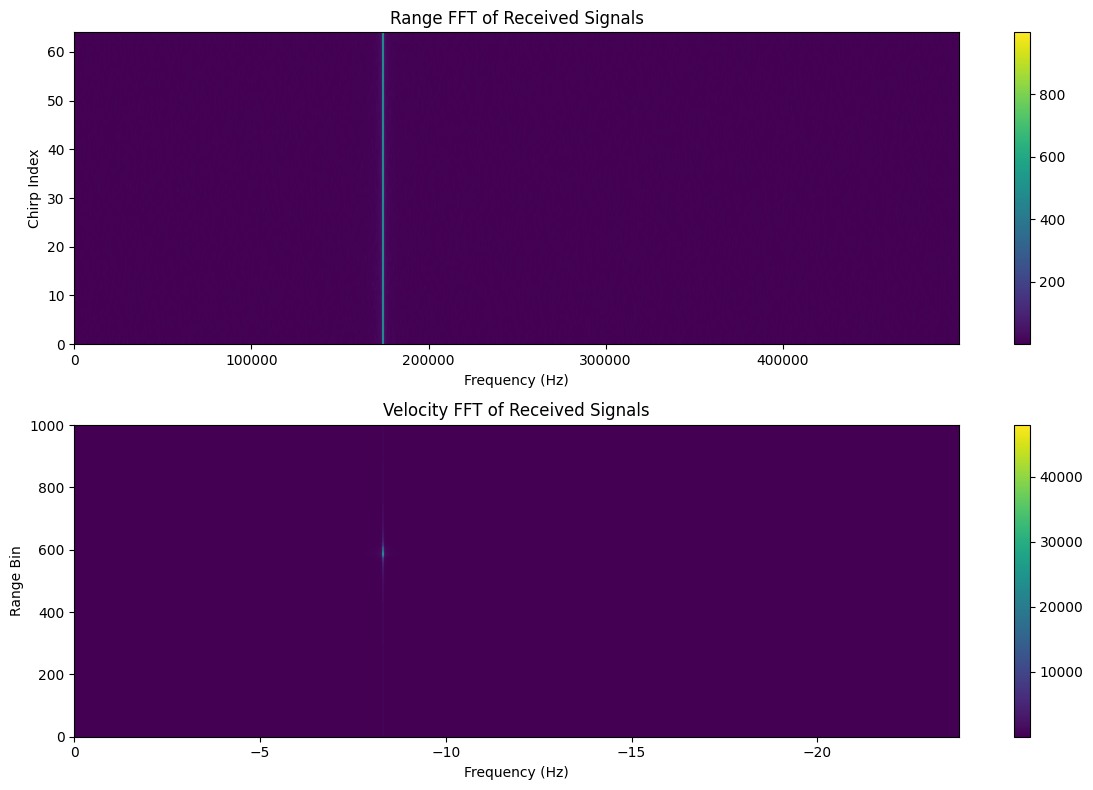

In [7]:
import numpy as np  
import matplotlib.pyplot as plt  

# 定义常量  
c = 3e8  # 光速 (m/s)  
f_c = 77e9  # 载波频率 (77 GHz)  
K = 2e12  # 调频斜率 (Hz/s)  
T_chirp = 1e-3  # Chirp 持续时间 (1 ms)  
f_s = 1e6  # 采样频率 (1 MHz)  
T_pulse = 20e-3  # 脉冲重复周期 (20 ms)  
R = 100  # 目标距离 (100 m)  
v = 30  # 目标速度 (30 m/s)  
num_chirps = 64  # Chirp 数量  
chirp_gap = 0.02  # Chirp 之间的间隔 (20 ms)  

# 生成时间序列  
t = np.arange(0, T_chirp, 1/f_s)  

# 计算回波信号  
def generate_echo_signal(R, v, chirp_idx, t, K, f_c, T_pulse, c):  
    tau = 2 * (R+ T_pulse*v*chirp_idx)/ c  # 时间延迟  
    f_d = 2 * v * f_c / c  # 多普勒频移  
    phase_term = 2 * np.pi * (2 * K * R / c + f_d) * t + 2 * np.pi * f_d * chirp_idx * (T_chirp + chirp_gap) + 2 * np.pi * 2 * f_c * R / c  
    signal = np.exp(1j * phase_term)  
    return signal  

# 初始化信号数组  
received_signals = np.zeros((num_chirps, len(t)), dtype=complex)  

# 生成多个chirp信号并添加噪声  
for chirp_idx in range(num_chirps):  
    echo_signal = generate_echo_signal(R, v, chirp_idx, t, K, f_c, T_pulse, c)  
    noise = np.random.normal(0, 0.1, len(echo_signal)) + 1j * np.random.normal(0, 0.1, len(echo_signal))  
    received_signals[chirp_idx, :] = echo_signal + noise  

# 进行距离维度的FFT分析  
range_fft = np.fft.fft(received_signals, axis=1)  
frequencies_range = np.fft.fftfreq(len(t), 1/f_s)  

# 进行速度维度的FFT分析  
velocity_fft = np.fft.fft(range_fft, axis=0)
frequencies_velocity = np.fft.fftfreq(num_chirps, T_chirp + chirp_gap)  

# 输出结果  
plt.figure(figsize=(12, 8))  

plt.subplot(2, 1, 1)  
plt.imshow(np.abs(range_fft), aspect='auto', extent=[frequencies_range[0], frequencies_range[len(t)//2], 0, num_chirps])  
plt.title("Range FFT of Received Signals")  
plt.xlabel("Frequency (Hz)")  
plt.ylabel("Chirp Index")  
plt.colorbar()  

plt.subplot(2, 1, 2)  
plt.imshow(np.abs(velocity_fft), aspect='auto', extent=[frequencies_velocity[0], frequencies_velocity[num_chirps//2], 0, len(t)])  
plt.title("Velocity FFT of Received Signals")  
plt.xlabel("Frequency (Hz)")  
plt.ylabel("Range Bin")  
plt.colorbar()  

plt.tight_layout()  
plt.show()

/tmp/ipykernel_5813/926892701.py:36: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  S1[l][n] = np.exp(np.complex(0, 1) * 2 * np.pi * (((2 * B * (tarR[0] + tarV[0] * T * l))/(c * T) + (2 * f0 * tarV[0])/c) * (T/N) * n + (2 * f0 * (tarR[0] + tarV[0] * T * l))/c))
/tmp/ipykernel_5813/926892701.py:41: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-note

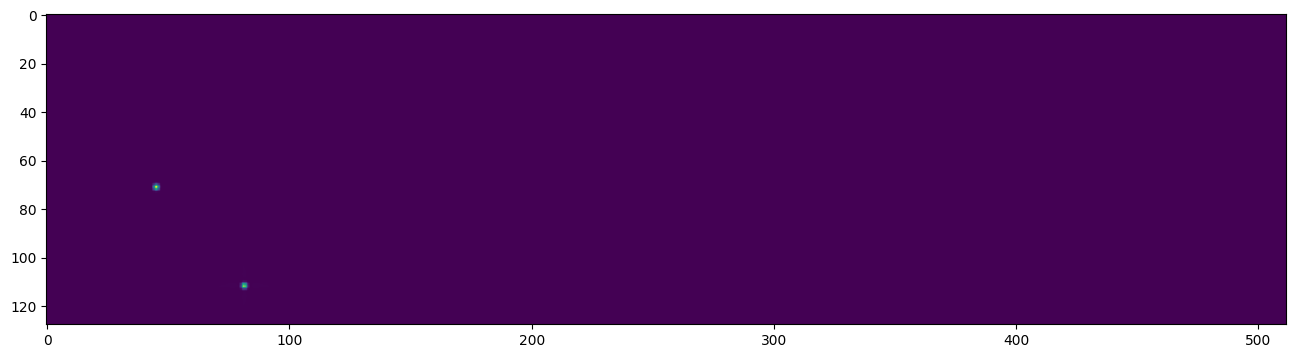

In [12]:
#!/usr/bin/env python
# -*- coding:utf-8 -*-
# @Time  : 2020/9/24 21:29
# @Author: lg6
# @File  : fmcw_2dfft_multi.py
 
 
# coding=utf-8
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from mpl_toolkits.mplot3d import Axes3D
 
# parameters setting
 
B = 135e6  # Sweep Bandwidth
T = 36.5e-6  # Sweep Time
N = 512  # Sample Length
L = 128  # Chirp Total
c = 3e8  # Speed of Light
f0 = 76.5e9  # Start Frequency
NumRangeFFT = 512  # Range FFT Length
NumDopplerFFT = 128  # Doppler FFT Length
rangeRes = c/2/B  # Range Resolution
velRes = c/2/f0/T/NumDopplerFFT  # Velocity Resolution
maxRange = rangeRes * NumRangeFFT  # Max Range
maxVel = velRes * NumDopplerFFT/2  # Max Velocity
tarR = [50, 90]  # Target Range
tarV = [3, 20]  # Target Velocity
 
# generate receive signal
 
S1 = np.zeros((L, N), dtype=complex)
for l in range(0, L):
    for n in range(0, N):
        S1[l][n] = np.exp(np.complex(0, 1) * 2 * np.pi * (((2 * B * (tarR[0] + tarV[0] * T * l))/(c * T) + (2 * f0 * tarV[0])/c) * (T/N) * n + (2 * f0 * (tarR[0] + tarV[0] * T * l))/c))
 
S2 = np.zeros((L, N), dtype=complex)
for l in range(0, L):
    for n in range(0, N):
        S2[l][n] = np.exp(np.complex(0, 1) * 2 * np.pi * (((2 * B * (tarR[1] + tarV[1] * T * l))/(c * T) + (2 * f0 * tarV[1])/c) * (T/N) * n + (2 * f0 * (tarR[1] + tarV[1] * T * l))/c))
 
sigReceive = S1 + S2
 
# range win processing
 
sigRangeWin = np.zeros((L, N), dtype=complex)
for l in range(0, L):
    sigRangeWin[l] = np.multiply(sigReceive[l], np.hamming(N).T)
 
# range fft processing
 
sigRangeFFT = np.zeros((L, N), dtype=complex)
for l in range(0, L):
    sigRangeFFT[l] = np.fft.fft(sigRangeWin[l], NumRangeFFT)
 
# doppler win processing
 
sigDopplerWin = np.zeros((L, N), dtype=complex)
for n in range(0, N):
    sigDopplerWin[:, n] = np.multiply(sigRangeFFT[:, n], np.hamming(L).T)
 
# doppler fft processing
 
sigDopplerFFT = np.zeros((L, N), dtype=complex)
for n in range(0, N):
    sigDopplerFFT[:, n] = np.fft.fftshift(np.fft.fft(sigDopplerWin[:, n], NumDopplerFFT))
 
 
fig = plt.figure(figsize=(16,12))
# ax = Axes3D(fig)
 
 
# x = np.arange(0, NumRangeFFT*rangeRes, rangeRes)
# y = np.arange((-NumDopplerFFT/2)*velRes, (NumDopplerFFT/2)*velRes, velRes)
# # x = np.arange(NumRangeFFT)
# # y = np.arange(NumDopplerFFT)
# # print(len(x))
# # print(len(y))
# X, Y = np.meshgrid(x, y)
# Z = np.abs(sigDopplerFFT)
# ax.plot_surface(X, Y, Z,
#                 rstride=1,  # rstride（row）指定行的跨度
#                 cstride=1,  # cstride(column)指定列的跨度
#                 cmap=plt.get_cmap('rainbow'))  # 设置颜色映射
 
# ax.invert_xaxis()  #x轴反向
 
# plt.show()
 

plt.imshow(np.abs(sigDopplerFFT))